In [9]:
"""
Purpose: This file will allows viewing the properties
of data files before cleaning is completed.
Input: a csv file to be inspected
Return: none
Output: file information
Lessons learned:
    1) Python vs Ipython
    2) panda plots need their own cell or they overlap (print two plots on same graph)
    3) Jupyter is like python but worse, each step needs it's own cell
    4) Ipython is like python but worse, magic words create obfuscation
"""
# import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
'''
% commands are "magic" commands for Ipython
With this backend, the output of plotting commands
is displayed inline within frontends like the
Jupyter notebook, directly below the code cell
that produced it. The resulting plots will then
also be stored in the notebook document.

# %% denotes a new cell (without the space)
'''
# is this line required?
#%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#change the working directory
path = "C:\\git_local\\WGU_Capstone\\Cleaned data"
os.chdir(path)
# read the data
csv_data = pd.read_csv('working_data.csv')

# shape and data types of the data
print(csv_data.shape)
print(csv_data.dtypes)

# select numeric columns
csv_data_numeric = csv_data.select_dtypes(include=[np.number])
numeric_cols = csv_data_numeric.columns.values
print(numeric_cols)

# select non numeric columns
csv_data_non_numeric = csv_data.select_dtypes(exclude=[np.number])
non_numeric_cols = csv_data_non_numeric.columns.values
print(non_numeric_cols)

# create a heat map of missing data
cols = csv_data.columns[0:]
# blue is missing, yellow is not missing
colours = ['#000099', '#ffff00']
sns.heatmap(csv_data[cols].isnull(), cmap=sns.color_palette(colours))


#create a histogram of the data
csv_data.hist(bins=100)

(112650, 6)
product_id          object
seller_id           object
price              float64
item_id              int64
customer_id         object
order_timestamp     object
dtype: object
['price' 'item_id']
['product_id' 'seller_id' 'customer_id' 'order_timestamp']


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'item_id'}>]], dtype=object)

In [10]:
#create boxplots of the data
csv_data.boxplot(column=['price'])

<AxesSubplot:title={'center':'item_id'}>

In [3]:
#create boxplots of the data
csv_data.boxplot(column=['item_id'])

<AxesSubplot:title={'center':'item_id'}>

In [4]:
# describe the data
csv_data['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [5]:
# describe the data
csv_data['item_id'].describe()

count    112650.000000
mean          1.197834
std           0.705124
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: item_id, dtype: float64

In [6]:
# create bar charts
csv_data['item_id'].value_counts().plot.bar(x='# of items ordered')

<AxesSubplot:title={'center':'item_id'}>

In [7]:
#create bar charts
#this runs super slow
#csv_data['price'].value_counts().plot.bar(x='Price')

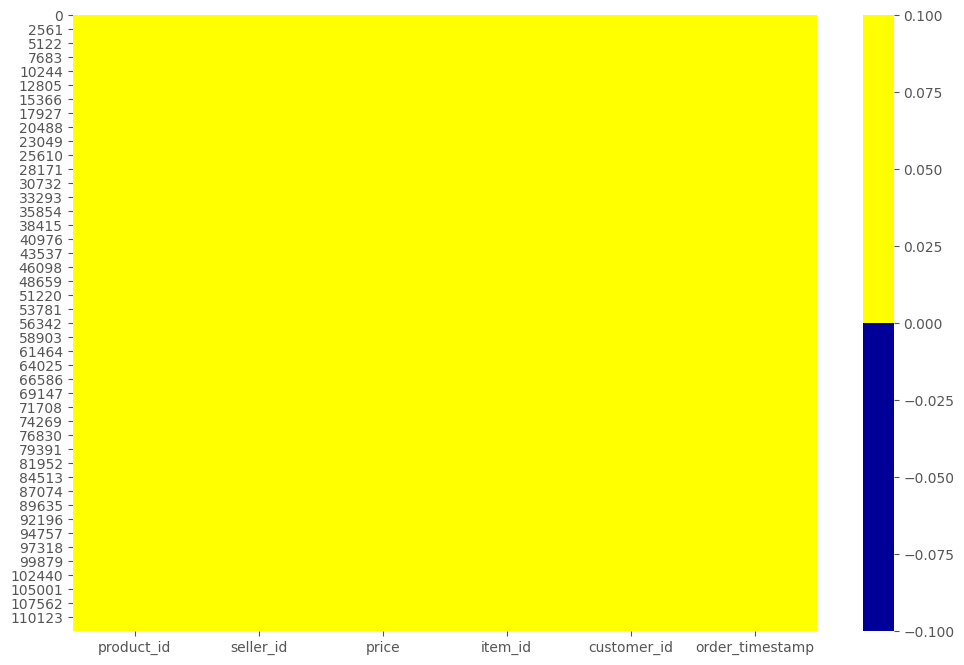

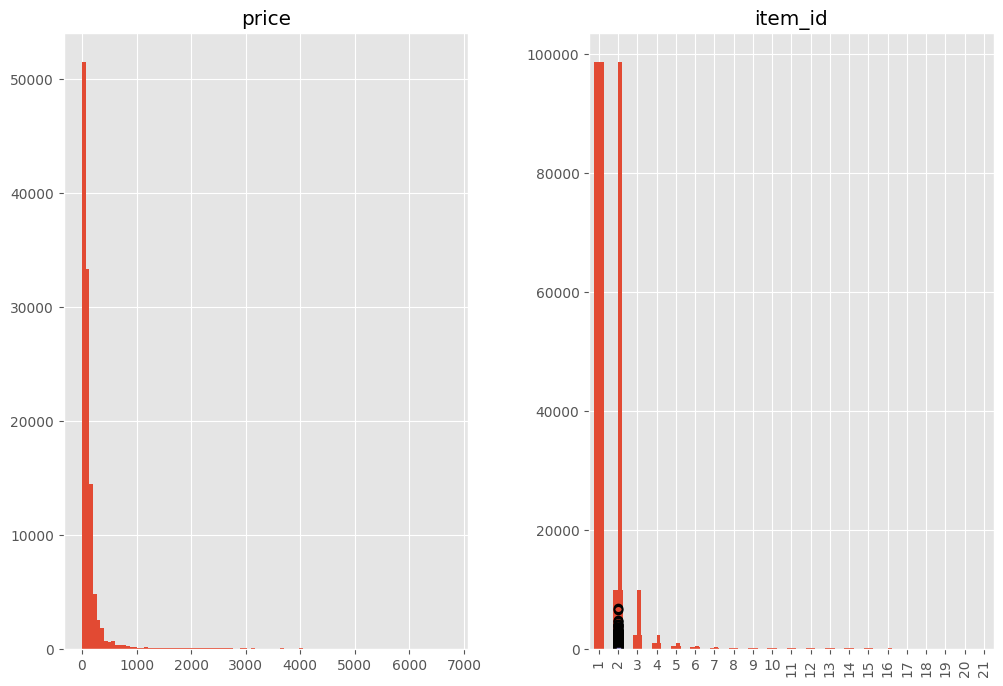

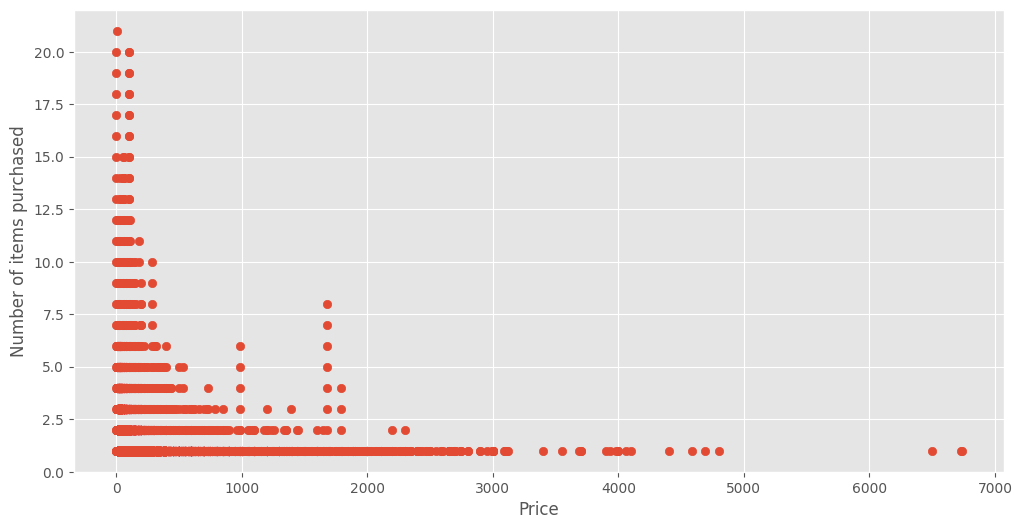

In [8]:
# add some scatter plots
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(csv_data['price'], csv_data['item_id'])
ax.set_xlabel('Price')
ax.set_ylabel('Number of items purchased')
plt.show()